# Webscrapping

Hi,
This is a sample webscrapping project in which we extract, transform and load the data(ETL). We have used Beautiful Soup (bs4). We are using request library to communicate with the website.We have used pandas to create dataframes and Matplotlib to visulize the data.

In [59]:
# checking weather requirements are fullfilled
!pip install bs4
!pip install html5lib
!pip install pandas
!pip install requests
!pip install matplotlib

## importing the important lib

In [2]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

### making connection with website and requesting the data in text file

In [3]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/netflix_data_webpage.html"
data = requests.get(url).text

In [4]:
soup = BeautifulSoup(data, 'html5lib')

### creating dataframe with data

In [5]:
netflix_data = pd.DataFrame(columns=["Date", "Open", "High", "Low", "Close", "Volume"])
# First we isolate the body of the table which contains all the information
# Then we loop through each row and find all the column values for each row
for row in soup.find("tbody").find_all('tr'):
    col = row.find_all("td")
    date = col[0].text
    Open = col[1].text
    high = col[2].text
    low = col[3].text
    close = col[4].text
    adj_close = col[5].text
    volume = col[6].text
    # Finally we append the data of each row to the table
    netflix_data = netflix_data.append({"Date":date, "Open":Open, "High":high, "Low":low, "Close":close, "Adj Close":adj_close, "Volume":volume}, ignore_index=True) 
        

### verifiying the data

In [6]:
netflix_data.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,"Jun 01, 2021",504.01,536.13,482.14,528.21,"78,560,600",528.21
1,"May 01, 2021",512.65,518.95,478.54,502.81,"66,927,600",502.81
2,"Apr 01, 2021",529.93,563.56,499.00,513.47,"111,573,300",513.47
3,"Mar 01, 2021",545.57,556.99,492.85,521.66,"90,183,900",521.66
4,"Feb 01, 2021",536.79,566.65,518.28,538.85,"61,902,300",538.85


### using pandas read_html function for extracting data directly using html

In [7]:
read_html_pandas_datas = pd.read_html(url)

In [8]:
read_html_pandas_data = pd.read_html(str(soup))

In [9]:
netflix_dataframe = read_html_pandas_data[0]

In [10]:
netflix_dataframe.head()

,Date,Open,High,Low,Close*,Adj Close**,Volume
0,"Jun 01, 2021",504.01,536.13,482.14,528.21,528.21,78560600
1,"May 01, 2021",512.65,518.95,478.54,502.81,502.81,66927600
2,"Apr 01, 2021",529.93,563.56,499.00,513.47,513.47,111573300
3,"Mar 01, 2021",545.57,556.99,492.85,521.66,521.66,90183900
4,"Feb 01, 2021",536.79,566.65,518.28,538.85,538.85,61902300


In [11]:
soup.title

<title>Netflix, Inc. (NFLX) Stock Historical Prices &amp; Data - Yahoo Finance</title>

In [12]:
netflix_dataframe.tail()

,Date,Open,High,Low,Close*,Adj Close**,Volume
66,"Dec 01, 2015",124.47,133.27,113.85,114.38,114.38,319939200
67,"Nov 01, 2015",109.20,126.60,101.86,123.33,123.33,320321800
68,"Oct 01, 2015",102.91,115.83,96.26,108.38,108.38,446204400
69,"Sep 01, 2015",109.35,111.24,93.55,103.26,103.26,497401200
70,*Close price adjusted for splits.**Adjusted cl...,*Close price adjusted for splits.**Adjusted cl...,*Close price adjusted for splits.**Adjusted cl...,*Close price adjusted for splits.**Adjusted cl...,*Close price adjusted for splits.**Adjusted cl...,*Close price adjusted for splits.**Adjusted cl...,*Close price adjusted for splits.**Adjusted cl...


In [13]:
netflix_dataframe.iloc[:10]

,Date,Open,High,Low,Close*,Adj Close**,Volume
0,"Jun 01, 2021",504.01,536.13,482.14,528.21,528.21,78560600
1,"May 01, 2021",512.65,518.95,478.54,502.81,502.81,66927600
2,"Apr 01, 2021",529.93,563.56,499.00,513.47,513.47,111573300
3,"Mar 01, 2021",545.57,556.99,492.85,521.66,521.66,90183900
4,"Feb 01, 2021",536.79,566.65,518.28,538.85,538.85,61902300
5,"Jan 01, 2021",539.00,593.29,485.67,532.39,532.39,139988600
6,"Dec 01, 2020",492.34,545.50,491.29,540.73,540.73,77564100
7,"Nov 01, 2020",478.87,518.73,463.41,490.70,490.70,91788900
8,"Oct 01, 2020",506.03,572.49,472.21,475.74,475.74,154302400
9,"Sep 01, 2020",532.60,557.39,458.60,500.03,500.03,118796900


In [14]:
netflix_dataframe.iloc[:10]['Open']

0    504.01
1    512.65
2    529.93
3    545.57
4    536.79
5    539.00
6    492.34
7    478.87
8    506.03
9    532.60
Name: Open, dtype: object

## plotting the data for better insights

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline

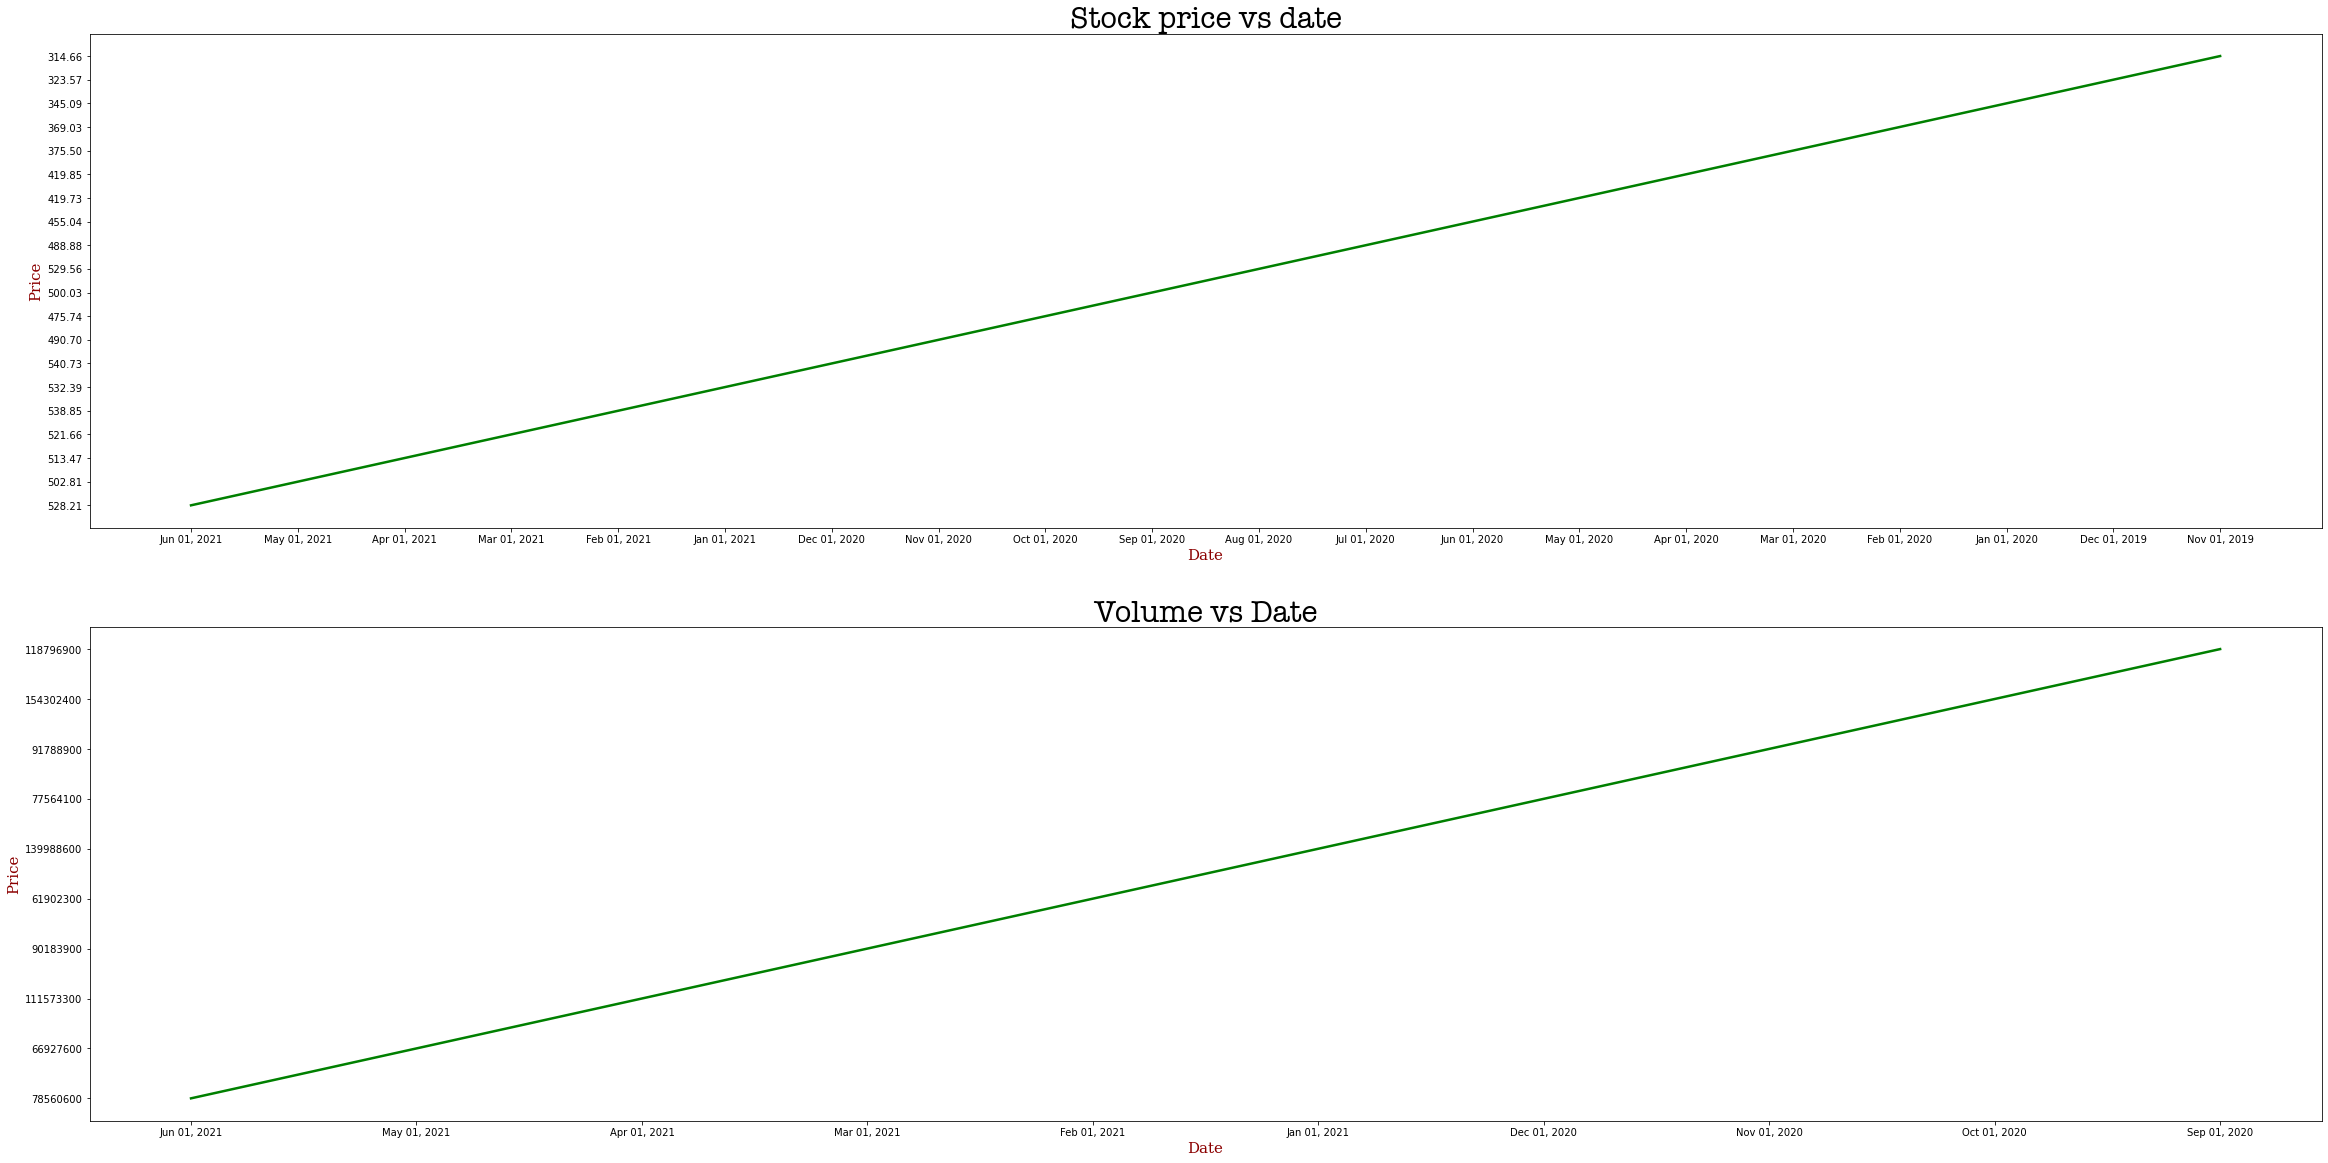

In [57]:
font1 = {'family':'American Typewriter','color':'black','size':30}
font2 = {'family':'serif','color':'darkred','size':15}
plt.figure(figsize = (40, 20))
plt.subplot(2, 1, 1)

plt.plot(netflix_dataframe['Date'].head(20), netflix_dataframe['Close*'].head(20), color = 'g', linewidth = '2.5')
plt.title('Stock price vs date', fontdict = font1)
plt.xlabel('Date', fontdict = font2)
plt.ylabel('Price', fontdict = font2)
plt.subplot(2, 1, 2)
# plt.figure(figsize = (20, 10))
plt.plot(netflix_dataframe['Date'].head(10), netflix_dataframe['Volume'].head(10), color = 'g', linewidth = '2.5')
plt.title('Volume vs Date', fontdict = font1)
plt.xlabel('Date', fontdict = font2)
plt.ylabel('Price', fontdict = font2)
plt.show()

#### I hope you have liked it. Thank you 